In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from StockDataAnalyzer import  StockDatapipeline

ModuleNotFoundError: No module named 'StockDataAnalyzer'

In [ ]:
data = StockDatapipeline.get_stock_data_from_ticker('CTXC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data = data.set_index('Date')
data.index = pd.to_datetime(data.index,unit='ns')
print(data.index)
     

DatetimeIndex(['2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20',
               ...
               '2022-11-26', '2022-11-27', '2022-11-28', '2022-11-29',
               '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-03',
               '2022-12-04', '2022-12-05'],
              dtype='datetime64[ns]', name='Date', length=908, freq=None)


In [ ]:
aim = 'Close'

In [ ]:
train_data = data.iloc[:700]
test_data = data.iloc[700:]

def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('XRP/USDT', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

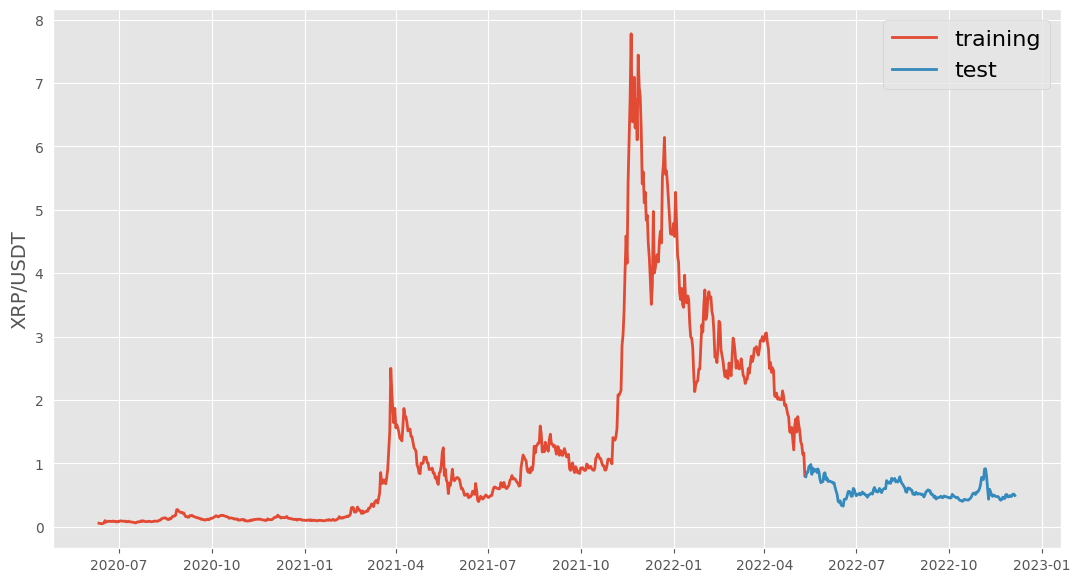

In [ ]:
line_plot(train_data[aim], test_data[aim], 'training', 'test', title='')

In [ ]:
def normalise_zero_base(continuous):
    return continuous / continuous.iloc[0] - 1

def normalise_min_max(continuous):
    return (continuous - continuous.min()) / (data.max() - continuous.min())

In [ ]:
def extract_window_data(continuous, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(continuous) - window_len):
        tmp = continuous[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)
def prepare_data(continuous, aim, window_len=10, zero_base=True, test_size=0.2):
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[aim][window_len:].values
    y_test = test_data[aim][window_len:].values
    if zero_base:
        y_train = y_train / train_data[aim][:-window_len].values - 1
        y_test = y_test / test_data[aim][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test
import numpy as np

In [ ]:
from tensorflow.keras import layers

In [ ]:
def build_lstm_model(input_data, output_size, neurons, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model


In [ ]:
np.random.seed(245)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 50
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.24
optimizer = 'adam'
train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
    data, aim, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [ ]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)

In [ ]:
modelfit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
22/22 [==============================] - 3s 31ms/step - loss: 0.0508 - val_loss: 0.0115
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0360 - val_loss: 0.0100
Epoch 3/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0260 - val_loss: 0.0103
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0262 - val_loss: 0.0093
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0254 - val_loss: 0.0090
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0255 - val_loss: 0.0090
Epoch 7/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0216 - val_loss: 0.0086
Epoch 8/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.0084
Epoch 9/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0188 - val_loss: 0.0086
Epoch 10/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0207 - val_loss: 0.0087
Epoch 11/20
22/22 

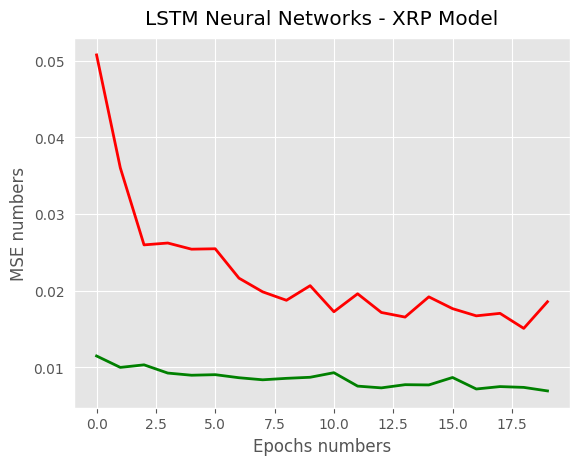

In [ ]:
import matplotlib.pyplot as plt
plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM Neural Networks - XRP Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()
     

In [ ]:
targets = test_data[aim][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)
     

7/7 [==============================] - 0s 2ms/step


0.057390480736794744

In [ ]:
from sklearn.metrics import mean_squared_error
SCORE_MSE=mean_squared_error(preds, y_test)
SCORE_MSE
     

0.006925175533266314

In [ ]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, preds)
r2_score*100

73.89866652333397

In [ ]:
window_len = 5

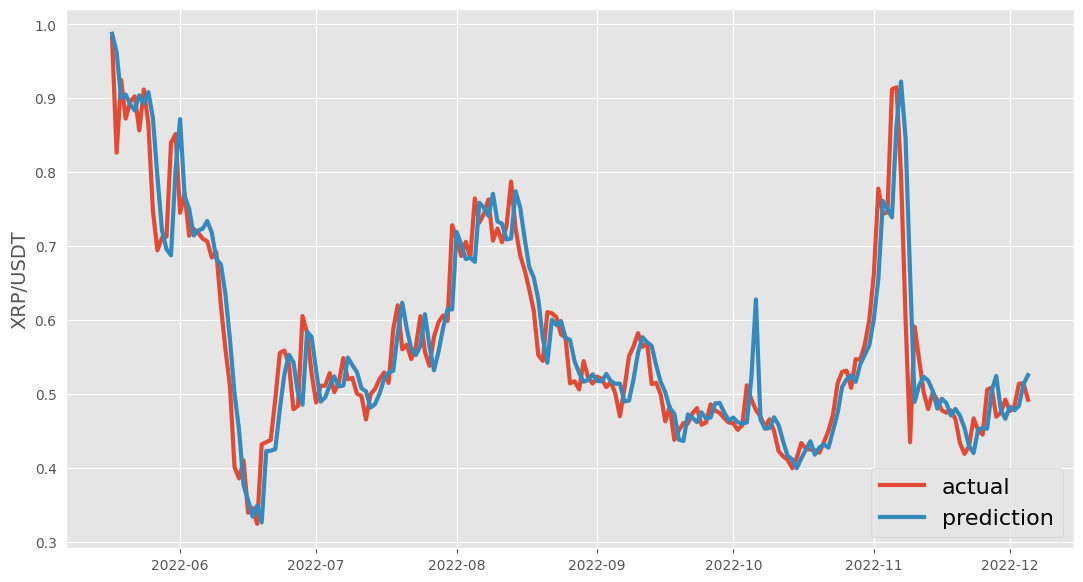

In [ ]:
preds = test_data[aim].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)